### Titanic Surviver Machine Learning Project
#### 28th of April 2022

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import random

In [2]:
# get data
tit = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

In [3]:
# Spit data into train and test
tit_train, tit_test = train_test_split(tit, random_state=1)

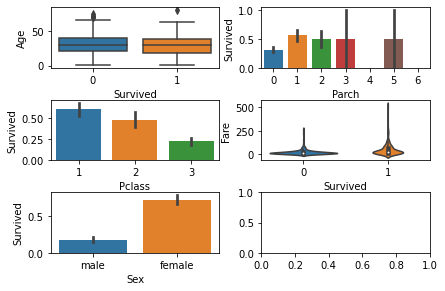

In [4]:
# Plot data
fig, axs = plt.subplots(3,2)
plt.tight_layout()
sns.barplot(ax=axs[2,0], data=tit_train, x="Sex", y="Survived")
sns.boxplot(ax=axs[0,0],data=tit_train, y="Age",x="Survived")
sns.barplot(ax=axs[0,1], data=tit_train, x="Parch", y="Survived")
sns.barplot(ax=axs[1,0],data=tit_train,x="Pclass",y="Survived")
sns.violinplot(ax=axs[1,1],data=tit_train,y="Fare",x="Survived")
plt.show()

In [5]:
# Overview of data (NaN)
print(tit_train.isna().sum())
print(tit_train["Age"].isna().sum()/len(tit_train.index))		# 20% of data is missing --> maybe keep?
print(tit_train["Cabin"].isna().sum()/len(tit_train.index))		# 77% of data is missing --> drop

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            133
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          519
Embarked         1
dtype: int64
0.19910179640718562
0.7769461077844312


In [6]:
# Drop all columns that are unimportant
tit_train.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [7]:
# Add column child
tit_train["Child"] = "NaN"
tit_train["Child"][tit_train["Age"] <= 17] = 1
tit_train["Child"][tit_train["Age"] > 17] = 0
tit_train = tit_train.sort_index()

/tmp/ipykernel_7466/878788826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit_train["Child"][tit_train["Age"] <= 17] = 1
/tmp/ipykernel_7466/878788826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit_train["Child"][tit_train["Age"] > 17] = 0


In [8]:
# Get indices of new DataFrame
index_train = []
for i in tit_train.index:
	index_train.append(i)
index_train = np.array(index_train)

In [9]:
# Change single NaN of "Embarked" to most frequent value
emb_freq = SimpleImputer(strategy="most_frequent")
cols = tit_train[["Embarked"]]
emb_freq.fit(cols)
emb_freq_t = emb_freq.transform(cols)
emb_freq_pd = pd.DataFrame(emb_freq_t, columns = cols.columns)
emb_freq_pd = emb_freq_pd.set_index(keys=index_train)
tit_train["Embarked"] = emb_freq_pd["Embarked"]

In [10]:
# Transform "Embarked" into binary
emb_ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')
emb_ohc.fit(tit_train[["Embarked"]])
emb_t = emb_ohc.transform(tit_train[["Embarked"]])
emb_pd = pd.DataFrame(emb_t, columns = emb_ohc.get_feature_names())
emb_pd = emb_pd.set_index(keys=index_train)
tit_train = tit_train.join(emb_pd)

/home/jens/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
# Transform "Sex" into binary
sex_ohc = OneHotEncoder(sparse=False, handle_unknown="ignore")
sex_ohc.fit(tit_train[["Sex"]])
sex_t = sex_ohc.transform(tit_train[["Sex"]])
sex_pd = pd.DataFrame(sex_t, columns=sex_ohc.get_feature_names())
sex_pd = sex_pd.set_index(keys=index_train)
tit_train = tit_train.join(sex_pd)

/home/jens/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
# Drop columns (old Embarked and Sex)
tit_train.drop(["Embarked", "Sex"], axis=1, inplace=True)
tit_train.dropna(inplace=True)

In [13]:
# Check if all NaN are gone 
print(tit_train.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Child          0
x0_C           0
x0_Q           0
x0_S           0
x0_female      0
x0_male        0
dtype: int64


In [14]:
### Transform test data
# Add column child
tit_test["Child"] = "NaN"
tit_test["Child"][tit_test["Age"] <= 17] = 1
tit_test["Child"][tit_test["Age"] > 17] = 0
tit_test = tit_test.sort_index()

/tmp/ipykernel_7466/3528309042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit_test["Child"][tit_test["Age"] <= 17] = 1
/tmp/ipykernel_7466/3528309042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit_test["Child"][tit_test["Age"] > 17] = 0


In [15]:
# Get indices of test data 
tit_test = tit_test.sort_index()
index_test = []
for i in tit_test.index:
	index_test.append(i)
index_test = np.array(index_test)

In [16]:
# Transform NaN in Embarkment
cols = tit_test[["Embarked"]]
emb_freq_t = emb_freq.transform(cols)
emb_freq_pd = pd.DataFrame(emb_freq_t, columns = cols.columns)
emb_freq_pd = emb_freq_pd.set_index(keys=index_test)
tit_test["Embarked"] = emb_freq_pd["Embarked"]

In [17]:
# Transform "Embarked" into binary
emb_t = emb_ohc.transform(tit_test[["Embarked"]])
emb_pd = pd.DataFrame(emb_t, columns = emb_ohc.get_feature_names())
emb_pd = emb_pd.set_index(keys=index_test)
tit_test = tit_test.join(emb_pd)

/home/jens/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
# Transform "Sex" into binary
sex_t = sex_ohc.transform(tit_test[["Sex"]])
sex_pd = pd.DataFrame(sex_t, columns=sex_ohc.get_feature_names())
sex_pd = sex_pd.set_index(keys=index_test)
tit_test = tit_test.join(sex_pd)

/home/jens/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
# Drop unnecessary columns
tit_test.drop(["Sex", "Embarked", "Name", "Ticket", "Cabin"], inplace=True, axis=1)

In [20]:
# Drop Age NaN
print(tit_test.isna().sum())
tit_test.dropna(inplace=True)
print(tit_test.isna().sum())

PassengerId     0
Survived        0
Pclass          0
Age            44
SibSp           0
Parch           0
Fare            0
Child           0
x0_C            0
x0_Q            0
x0_S            0
x0_female       0
x0_male         0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Child          0
x0_C           0
x0_Q           0
x0_S           0
x0_female      0
x0_male        0
dtype: int64


In [21]:
# Create X and y
X_train = tit_train.loc[:, tit_train.columns != "Survived"]
y_train = tit_train["Survived"]
X_test = tit_test.loc[:, tit_test.columns != "Survived"]
y_test = tit_test["Survived"]

forest = RandomForestClassifier(n_estimators = 100, max_depth = 6, random_state=1)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)

print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(X_train.columns)
print(forest.feature_importances_)
print(X_train)

0.7932960893854749
0.8412698412698413
0.6625
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Child',
       'x0_C', 'x0_Q', 'x0_S', 'x0_female', 'x0_male'],
      dtype='object')
[0.08971568 0.13408944 0.11740612 0.04340126 0.03874556 0.13222444
 0.03261527 0.0177076  0.00602782 0.01524592 0.18214188 0.19067902]
     PassengerId  Pclass   Age  SibSp  Parch     Fare Child  x0_C  x0_Q  x0_S  \
0              1       3  22.0      1      0   7.2500     0   0.0   0.0   1.0   
1              2       1  38.0      1      0  71.2833     0   1.0   0.0   0.0   
4              5       3  35.0      0      0   8.0500     0   0.0   0.0   1.0   
7              8       3   2.0      3      1  21.0750     1   0.0   0.0   1.0   
9             10       2  14.0      1      0  30.0708     1   1.0   0.0   0.0   
..           ...     ...   ...    ...    ...      ...   ...   ...   ...   ...   
883          884       2  28.0      0      0  10.5000     0   0.0   0.0   1.0   
884          885    

In [22]:
### Transform REAL test data
# Change nan Values in Age to random number and nan in Fare to mean
print(test.isna().sum())
test["Age"] = test["Age"].fillna(random.randint(0, test["Age"].max()))
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [23]:
# Add column child
test["Child"] = "NaN"
test["Child"][test["Age"] <= 17] = 1
test["Child"][test["Age"] > 17] = 0
test = test.sort_index()

/tmp/ipykernel_7466/2906669089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Child"][test["Age"] <= 17] = 1
/tmp/ipykernel_7466/2906669089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Child"][test["Age"] > 17] = 0


In [24]:
# Get indices of test data 
test = test.sort_index()
index_test_real = []
for i in test.index:
	index_test_real.append(i)
index_test_real = np.array(index_test_real)

In [25]:
# Transform NaN in Embarkment
cols = test[["Embarked"]]
emb_freq_t = emb_freq.transform(cols)
emb_freq_pd = pd.DataFrame(emb_freq_t, columns = cols.columns)
emb_freq_pd = emb_freq_pd.set_index(keys=index_test_real)
test["Embarked"] = emb_freq_pd["Embarked"]

In [26]:
# Transform "Embarked" into binary
emb_t = emb_ohc.transform(test[["Embarked"]])
emb_pd = pd.DataFrame(emb_t, columns = emb_ohc.get_feature_names())
emb_pd = emb_pd.set_index(keys=index_test_real)
test = test.join(emb_pd)

/home/jens/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
# Transform "Sex" into binary
sex_t = sex_ohc.transform(test[["Sex"]])
sex_pd = pd.DataFrame(sex_t, columns=sex_ohc.get_feature_names())
sex_pd = sex_pd.set_index(keys=index_test_real)
test = test.join(sex_pd)

/home/jens/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
# Drop unnecessary columns
test.drop(["Sex", "Embarked", "Name", "Ticket", "Cabin"], inplace=True, axis=1)

In [29]:
# Create X and y
X_test_real = test
pred_real = forest.predict(X_test_real)

In [30]:
# Save predictions as output in csv file
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred_real})
output.to_csv('submission 220428.csv', index=False)